# **ConvNet [part 3] Dropout layers and hyperparameters**

**Adding Dropout Layer**

A dropout layer is a very simple, yet quite counter-intuitive method. What it does is basically cutting off half of the connection between the layers. You may ask yourself a question - Why do I train the network so hard, only to randomly throw half of the information away? Surprisingly, this works. In many situations network is overfitting to the data so much, that randomly cutting 20%, 30%, or even 50% of connection during training phase will be beneficial.

Therefore, to further combat overfitting, we will also add a Dropout layer to our Dogs and Cats example. Please configure the model with the same four convolutional layers and four max-pooling layers like last week, but this time add the Dropout layer right before the densely-connected classifier (with parameter 0.5).



In [ ]:
# Implement the model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Train the model again, using ImageDataGenerator.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/train'

base_dir = '/content/drive/MyDrive/splits'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')

test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-6-41972bc32de5>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 1358s 13s/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6867 - val_accuracy: 0.5800
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6848 - accuracy: 0.5445 - val_loss: 0.6696 - val_accuracy: 0.5900
Epoch 3/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6697 - accuracy: 0.5745 - val_loss: 0.6959 - val_accuracy: 0.5010
Epoch 4/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6532 - accuracy: 0.6115 - val_loss: 0.6508 - val_accuracy: 0.5900
Epoch 5/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6211 - accuracy: 0.6380 - val_loss: 0.6224 - val_accuracy: 0.6280
Epoch 6/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5958 - accuracy: 0.6725 - val_loss: 0.6225 - val_accuracy: 0.6360
Epoch 7/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5710 - accuracy: 0.6960 - val_loss: 0.6199 - val_ac

Wy should expect higher accuracy, about 80-82% compared to 77-80% in the previous lab. Plot the results and compare them.



In [ ]:
#TODO: plot the results
from matplotlib import pyplot as plt

def plot_history(history_dict):
  training_loss = history_dict['loss']
  validation_loss = history_dict['val_loss']

  training_accuracy = history_dict['accuracy']
  validation_accuracy = history_dict['val_accuracy']

  plt.figure(figsize = (12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(training_loss)
  plt.plot(validation_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(training_accuracy)
  plt.plot(validation_accuracy)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.tight_layout()
  plt.show()

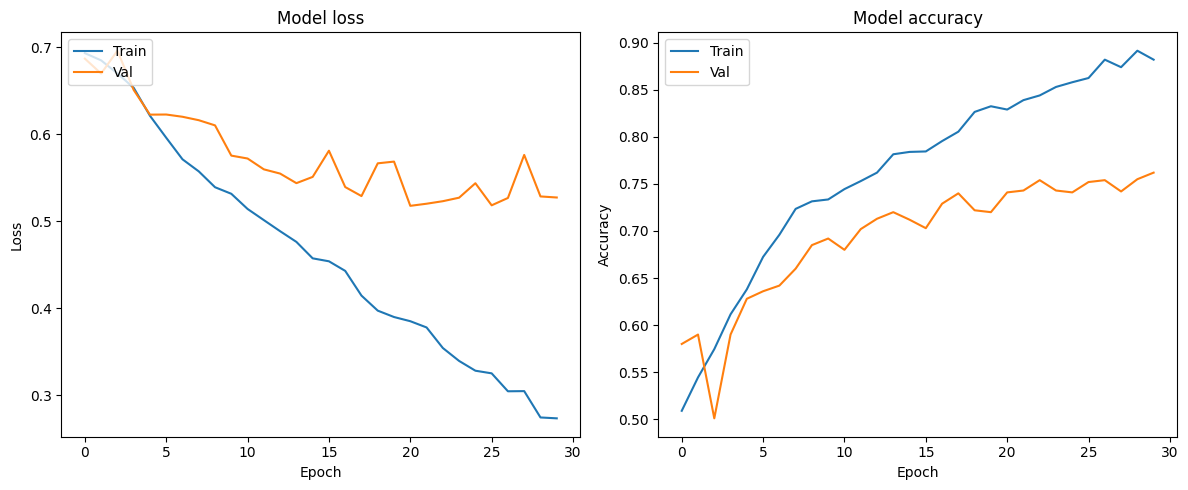

In [ ]:
history_dict = history.history

plot_history(history_dict)

Without image augmentation:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history_no_aug = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 442s 4s/step - loss: 0.6923 - accuracy: 0.5280 - val_loss: 0.6953 - val_accuracy: 0.5040
Epoch 2/30
100/100 [==============================] - 129s 1s/step - loss: 0.6806 - accuracy: 0.5655 - val_loss: 0.6861 - val_accuracy: 0.5470
Epoch 3/30
100/100 [==============================] - 125s 1s/step - loss: 0.6640 - accuracy: 0.6000 - val_loss: 0.6669 - val_accuracy: 0.5870
Epoch 4/30
100/100 [==============================] - 126s 1s/step - loss: 0.6488 - accuracy: 0.6130 - val_loss: 0.6378 - val_accuracy: 0.6330
Epoch 5/30
100/100 [==============================] - 126s 1s/step - loss: 0.6224 - accuracy: 0.6510 - val_loss: 0.6254 - val_accuracy: 0.6460
Epoch 6/30
100/100 [==============================] - 128s 1s/step - loss: 0.5946 - accuracy: 0.6840 - val_loss: 0.5964 - val_accuracy: 0.6800
Epoch 7/30
100/100 [==============================] - 129s 1s/step - loss: 0.5558 - accuracy: 0.7185 - val_loss: 0.5901 - val_accuracy: 0.6780

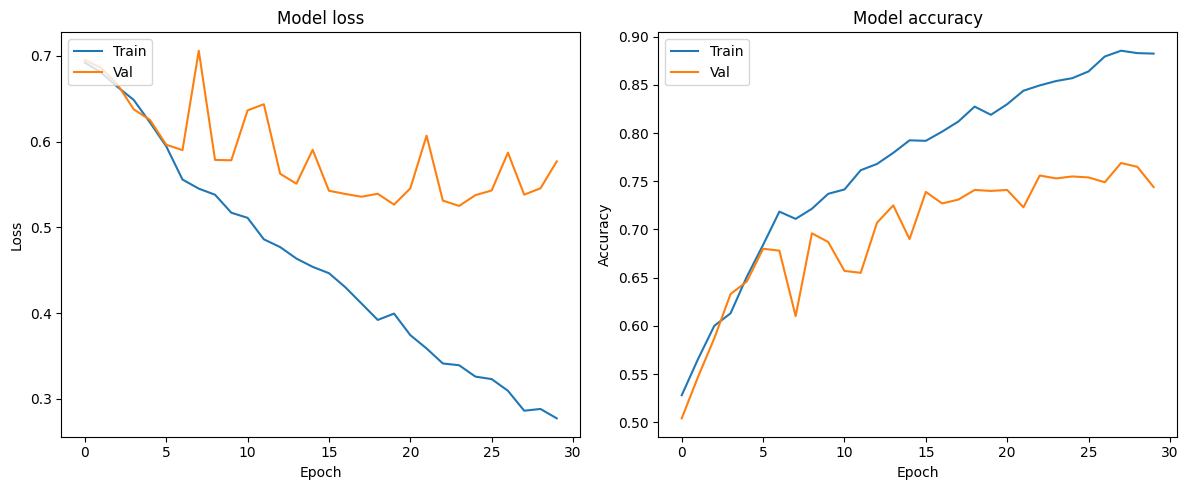

In [ ]:
history_no_aug_dict = history_no_aug.history

plot_history(history_no_aug_dict)

If you want, you can also try training the model with a dropout layer, but without image augmentation, to see which one is better. Both methods should give better results than training without any of them, but worse than having them combined. You may, however, notice, that dropout is faster.

If you want, you can change the dropout parameter. Maybe we cut off too much? You can also try to experiment with putting the dropout layer in different places (maybe between convolutions), or even adding more dropout layers. There is hardly ever one universal way to implement a model. Make some modifications and comment on the results.

# **Hyperparameters**

As we stated before, there is no one ideal solution to each deep learning task. To decide how many layers to add or which activation functions use you need practice and usually a lot of trials and errors. Some people even say that implementing a neural network from scratch is more art than science.

**Parameter optimisation**

Even then, after you decide what your model will look like, there is a matter of training, which also requires additional parameters. These numbers, that you already encountered, like a number of epochs, learning rate or optimizer are called hyperparameters. Training a neural network is basically an optimization problem, so you can think of setting those parameters as optimizing an optimization. It's not an easy task. There are, however, some tools that can help with that.

**Callbacks**

One of the simplest methods helpful in parameter selection is using Callbacks. These are basic functions that let you act on the model during training. They allow you to interrupt training to save a model, load a different weight set, or otherwise alter the state of the model. Here are some examples of ways you can use callbacks:

*   Model checkpointing—saving the current weights of the model
at different points during training.

*   Early stopping—interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
*   
Dynamically adjusting the value of certain parameters during training — such as the learning rate of the optimizer.
*Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated.


There are many default methods that you can explore in *keras.callbacks* such as *ModelCheckpoint*, *EarlyStopping* or *LearningRateScheduler*. However, one of the most useful things is that you can define your own callback and pass it to the model. So first, check if the desired functionality is available in Keras and if it isn't write it yourself.

To do so, you can use functions that trigger when certain action occurs:

* on_epoch_begin
* on_epoch_end
* on_batch_begin
* on_batch_end
* on_train_begin
* on_train_end



You can define function behavior after the trigger. In an example below, we check after each epoch if the training accuracy reaches a certain threshold (in this case 60%). If it does, we stop training. This is a useful method to decide on a number of epochs and avoid overfitting. You can read more about callbacks in [Keras Callbacks Documentation](https://keras.io/api/callbacks/).

First, you need to define a callback class:

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

For MNIST dataset:

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

11490434/11490434 [==============================] - 0s 0us/step


Then create a callback instance and pass it as an argument when using *.fit()* or *.fit_generator()*:

In [ ]:
callbacks = myCallback()

# model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9562
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1385 - accuracy: 0.9562


Your **task** is to use it on a simple mnist classification (lab 2) or any other network training from previous labs. You can change parameters or callback behaviour as you wish, as long as it succeeds to stop training earlier.


# **Optimisation algorithms from sklearn**

There are various algorithms that automatically set different parameters, run training, and repeat the process. For example, the Scikit-Learn library provides [Grid Search Method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [Random Search Method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). You can read more about them in the documentation. More sophisticated methods, like genetic algorithms or particle swarm optimization, are sometimes used too.

Your last task this week is to use Grid Search Optimisation algorithm to optimise one of the networks from previous weeks. Choose two parameters (for example number of epochs and batch size) and try two different values for each parameter. Grid Search method will therefore create a mesh of these parameters, with four elements (2×2). This process will take more time and computation power, as it will basically train the model four times and compare results. If you don't have a good computer it is best to try it on simple mnist classification. However, if you want a more challenging task, try to improve dogs and cats or Reuters classification.

Z lokalnej maszyny, bo coś nie działa na Colabie:

In [ ]:
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

def create_model():
    model = models.Sequential()
    # model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# model = KerasClassifier(build_fn=create_model)

# par1_batch = [64, 128]
# par2_epoch = [3, 5]

# param_grid = dict(batch_size=par1_batch,
#                   epochs=par2_epoch
#                   )

# grid = GridSearchCV(estimator=model,
#                     param_grid=param_grid,
#                     cv = 3
#                     )

model = KerasClassifier(model=create_model, verbose=0)

param_grid = {
    'batch_size': [64, 128],
    'epochs': [3, 5]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# grid_results = grid.fit(X,Y)
grid_results = grid.fit(train_images, train_labels)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))


Best: 0.987667 using {'batch_size': 64, 'epochs': 5}


Please upload your results on UPEL platform. Make sure it includes the code and training results for all three exercises, as well as plots for dropout exercise.

